# Introduction
Hi! And welcome to our webside. Today we will explore trees in Copenhagen. More precisely, we want to investigate if the municipality of Copenhagen is fulfilling the following two principles of their tree policy:
1. There must be planted more trees in Copenhagen 
2. There should be a large variation in tree species in Copenhagen 

As you probably agree on, it is lovely to live in a neighbourhood with green environments. During spring, the trees get green leaves reminding us all that summer is near. During summer, the trees are producing fruits and creating shadow from the sun. In autumn, the leaves are getting coloured, and in the winter, they are decorated for christmas. Overall, trees bring so must joy and groud for playing.
Besides the value that trees create for the people, trees are creating important value for the environment by reducing CO2, improving air quality and purifying water. 

Hence we want to make sure that the municipality of Copenhagen is planting more trees and increasing the variation in species as their policy mention. Also, we want to investigate if there is a difference in where the municipality are planting trees? Is there more focus on some distrcits than other? And if so, what might be the reason for that? 

Those are some of the questions we are seeking to answer today. Lets go and explore! 

# More trees planted over the years?
We will start by investigating the first principle: are the municipality of Copenhagen planting more trees? 

First let's have a look at the total number of trees planted in Copenhagen from 2000 to 2020. 

In [10]:
## Packages 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import folium
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
# For bokeh visualisations
from bokeh.plotting import figure
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.layouts import row
# For heatmaps
from folium.plugins import HeatMapWithTime

In [11]:
# load tree data 
df = pd.read_csv("data/df_tree.csv")
df.year = df.year.apply(int)
df.id = df.id.astype("category")

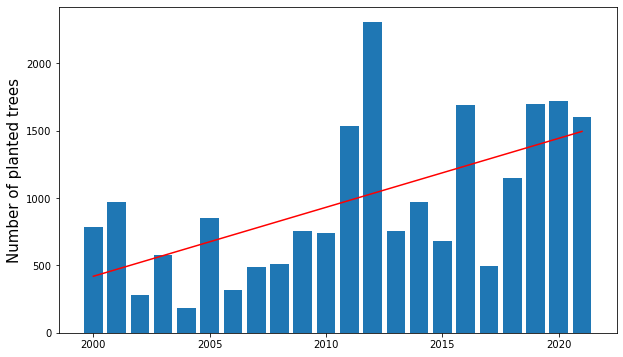

In [12]:
df_year = df.groupby(['year']).size() # get number of trees planted per year 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_year.index.to_list(),df_year.values) # for trend curve

# plot 
plt.figure(figsize=(10,6))
plt.bar(df_year.index,df_year.values)
plt.plot(df_year.index, slope*(df_year.index) + intercept, 'r-')
plt.ylabel('Number of planted trees',fontsize=15)
plt.show()

In general, it appears that there is an upward trend in the number of trees planted in Copenhagen from 2000 to 2020. The red curve showing the linear trend is definetely having a positive slope! 

However, the blue bars show that there is much variation in the number of trees planted from year to year. For instance, the number of trees planted in 2012 is especially high and the number of trees planted in 2017 is low.  

Let's now have a look at the number of trees planted over time in the different districts of Copenhagen. 

In [13]:
# Line plot showing trees planted per km2 in each district from 2000 to 2021 
df_genial = pd.read_csv('data/df_genial.csv')
df_grøn = df_genial[['year','district','trees_km2']]
df_km2_year = pd.pivot_table(df_grøn, values='trees_km2', index='year', columns=['district'], fill_value=0)


df_districts = df.groupby(["year", "district"]).size().reset_index()
districts = df_districts.district.unique()

# BOKEH 
reset_output() # If you are having issues with visualizing Bokeh plots in the notebook try to uncomment this line
# prepare data for bokeh plot
#Create empty figures

p1 = figure(plot_width = 900, plot_height = 500, title = "Number of trees planted per km2 for each district", 
            x_axis_label = "Year", y_axis_label = "Number of trees per km2") 


#colors
colors = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
#Create empty list for custom legend
items1 = []

#Add line by using p.line
line ={}
# Pivot table for number of unique species in each district over the years 
df_km2_year = pd.pivot_table(df_grøn, values='trees_km2', index='year', columns=['district'], fill_value=0)

# Insert fraction values in bars
for indx, i in enumerate(districts):
    line[indx] = p1.line(x=df_km2_year.index, y = df_km2_year[i], width=1.5, color = colors[indx], muted =True)
    #Append items to create the legend
    items1.append((districts[indx], [line[indx]]))


#This is to manage the legend in plot
#add the legend outside the plot
legend = Legend(items=items1, location="top_left")
p1.add_layout(legend, 'left')

p1.legend.click_policy = "mute" #you can also try "hide"
p1.title.text_font_size = "20px"


output_notebook()
show(p1)

Loading BokehJS ...

Try to click on one (or more) of the districts on the above figure. At the figure, the number of trees planted is normalised using the area size of the district such that we are looking at the number of trees planted per km2. 

This visualisation suggests, that there might be a difference in the number of trees planted between the districts. Try for example to compare Nørrebro and Østerbro with Amager Vest, Amager Øst and Brønshøj-Husum. What is happening around 2007? 

Let's look at it with some stats. 

<!-- Overall, the visualisation show that the number of planted trees per km2 fluctuates a lot between the years for each district why it can be difficult to determine the trend. However, it is clear that the variation in the number of trees planted per km2 between the districts is increasing after ~2007. While looking at the curves after 2007, this visualisation suggests that there might be a difference in the number of trees planted per km2 between some of the districts. Try to click on Østerbro and Nørrebro and see that the number of trees planted per km2 is increasing around 2007/2008 and with large spikes in 2012, 2016 and 2020/2021. 
Also, some of the districts seem to have only a small increase in the number of trees being planted. Try to click on 'Amager Vest', 'Amager Øst' and 'Brønshøj-Husum'. These districts appears to have a smaller upward trend and no large spikes such as 'Nørrebro' and 'Amager Vest'.
--> 


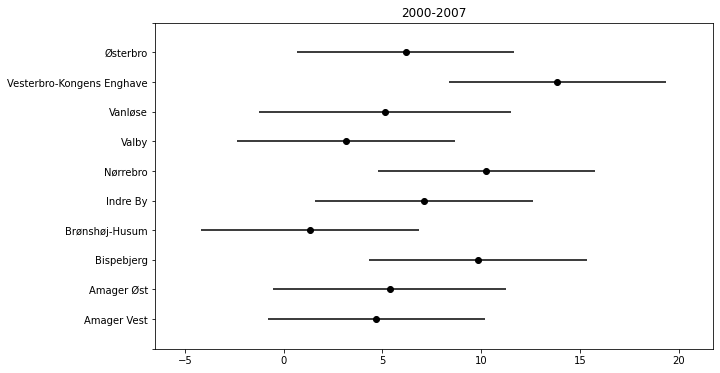

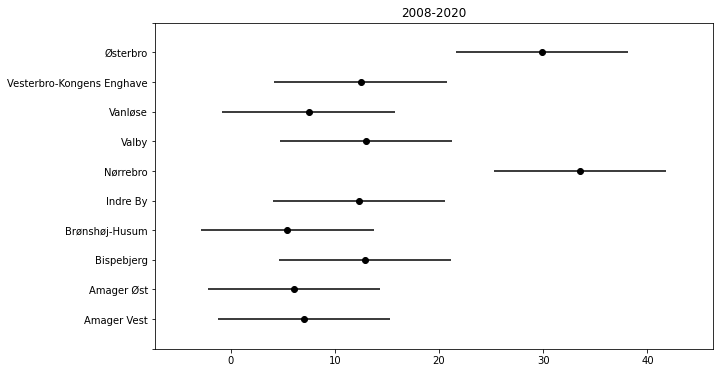

In [14]:
# Turkey's pairwise test to compare means before and after 2007 
df_p1 = df_genial[df_genial['year'].isin([2000,2001,2002,2003,2004,2005,2006,2007])]
df_p2 = df_genial[df_genial['year'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
tukey_p1 = pairwise_tukeyhsd(endog=df_p1['trees_km2'], groups=df_p1['district'], alpha=0.05)
tukey_p2 = pairwise_tukeyhsd(endog=df_p2['trees_km2'], groups=df_p2['district'], alpha=0.05)

tukey_p1.plot_simultaneous()
plt.title('2000-2007')
tukey_p2.plot_simultaneous()
plt.title('2008-2020')
plt.show()

The above two plots show a pairwise statistical comparison of group means, where the group means in this case corresponds to the average number of planted trees per km2 for the districts. 

The black dots represent the group means while the bar length represents the 95%-confidence interval for the group mean. Two districts are not significantly different in mean value if their bars overlap. On the other hand, if the bars of two districts do not overlap, the difference in mean value is statistically significant. 

Hence it is seen that the average number of planted trees per km2 is not significantly different between any districts when looking at data from the period 2000-2007. However, when looking at the period from 2008 and onwards, the average number of trees planted per km2 is significantly larger for the two districts Nørrebro and Østerbro compared to the other 8 districts. 

At the below heatmaps, we will dig into where the trees are planted in Østerbro and Nørrebro after 2007 - is it on the streets or in parks? 

In [15]:
# Heat map showing planted 
df_heatmap = df[df['year']>2007]
df_heatmap_nørrebro = df_heatmap[df_heatmap['district'] == 'Nørrebro']

heat_data = pd.DataFrame()
heat_data[['Y','X', "Weight"]] = df_heatmap_nørrebro[['Y','X', "year"]]
heat_data['Weight'] = heat_data['Weight'].astype(float)
heat_data = heat_data.dropna(axis=0, subset=['Y','X', 'Weight'])
heat_data = [[[row['Y'],row['X']] for index, row in heat_data[heat_data['Weight'] == i].iterrows()] for i in range(2008,2021)]

# gps coordinates for Nørrebros runddel 
lat = 55.692108154296875
lon = 12.552446365356445
map = folium.Map(location=[lat, lon],zoom_start = 14)
hm = HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map)
map

2012: stop at 5, trees planted in mimersparken and superkilen. 
Mimersparken: park mellem Bispebjerg station og mjølnerparken. Åbnet i 2012. https://da.wikipedia.org/wiki/Mimersparken
Superkilen: park mellem Mimersgade og Tagensvej, åbnet i 2012. https://da.wikipedia.org/wiki/Superkilen

2016: stop at 9, trees planted in Assistenskirkegården (park) but also spread out on the streets. 

2018: Nørrebroparken, Guldbergsplads, Nørrebros runddel 

In [16]:
df_heatmap_østerbro = df_heatmap[df_heatmap['district'] == 'Østerbro']

heat_data = pd.DataFrame()
heat_data[['Y','X', "Weight"]] = df_heatmap_østerbro[['Y','X', "year"]]
heat_data['Weight'] = heat_data['Weight'].astype(float)
heat_data = heat_data.dropna(axis=0, subset=['Y','X', 'Weight'])
heat_data = [[[row['Y'],row['X']] for index, row in heat_data[heat_data['Weight'] == i].iterrows()] for i in range(2008,2021)]

# Plot it on the map
lat = 55.7075777778
lon = 12.5688722222
map = folium.Map(location=[lat, lon],zoom_start = 13)
hm = HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map)
map

2012: stop at 5. Trees planted in Fælledparken and Klosterfælleden. 

2016: A lot of trees planted at Ryparken, Nordhavns vej and Nordhavn - preparing for the opening of the new city district Nordhavn? 

2019: Many trees planted at Bryggervangen, ydre Østerbro. Poul Henningsens Plads og Vibenhus runddel - more focus on the outer part of the districts? 


After looking at where the many trees were planted in Østerbro and Nørrebro in the period after 2007, we can conclude that many trees were planted in parks but also (especially in 2016) on the streets. So why does it seem like the municipality of Copenhagen are focusing on these two districts when it comes to green environments? One hypothesis could be that the municipality of Copenhagen is prioritasing districts where richer people lives. Let's check if districts where richer people lives are being prioritised. 

## Relation between income and planted trees? 

Let's first take a look at the average income and the average number of study years in the 10 districts. In Denmark, education and income is highly correlated. Thus in general, the more years of education the higher income. This is also the case for the 10 districts of Copenhagen where the correlation between years of education and income is in the range 0.94 in Bispebjerg to 0.99 in Amager Vest.

In [17]:
# load income and education data 
df_income = pd.read_csv('data/df_income.csv')
df_education = pd.read_csv('data/df_education.csv')

# Get average number of years in education per district
grundskole = 10
erhvervsfaglig = grundskole + 2
gymnasiel = grundskole + 3
lang_videregående = gymnasiel + (5+8)/2
mellem_videregående = gymnasiel + 3

# calculate average number of study year per district
df_education['total_study_year'] = (df_education['Erhvervsfaglige og korte videregående uddannelser']*erhvervsfaglig
+ df_education['Grundskole og uoplyst mv.']*grundskole
+ df_education['Gymnasiale uddannelser og adgangsgivende uddannelsesforløb']*gymnasiel
+ df_education['Lange videregående uddannelser og Ph.d og forskeruddannelser']*lang_videregående
+ df_education['Mellemlange videregående uddannelser og bacheloruddannelser']*mellem_videregående)
df_education['total_educated'] = df_education[['Erhvervsfaglige og korte videregående uddannelser','Grundskole og uoplyst mv.','Gymnasiale uddannelser og adgangsgivende uddannelsesforløb','Lange videregående uddannelser og Ph.d og forskeruddannelser','Mellemlange videregående uddannelser og bacheloruddannelser']].sum(axis=1)
df_education['avg_study_year'] = df_education.total_study_year/df_education.total_educated

# demo data 
df_demo = pd.merge(df_income,df_education)
df_demo = df_demo[['year','district','avg_income','avg_study_year']]

In [18]:
df_demo_corr = pd.DataFrame(index=districts, columns = ['correlation between income and number of study years'])
for dist in districts:
    temp = df_demo[df_demo['district']==dist]
    corr = temp[['avg_income','avg_study_year']].corr()
    df_demo_corr.loc[dist,'correlation between income and number of study years'] = corr.iloc[0,1]

df_demo_corr.sort_values(by='correlation between income and number of study years', ascending=False, inplace=True)
df_demo_corr   

,correlation between income and number of study years
Amager Vest,0.986473
Amager Øst,0.984852
Valby,0.979591
Østerbro,0.979527
Vanløse,0.977473
Vesterbro-Kongens Enghave,0.976949
Indre By,0.971014
Nørrebro,0.955797
Brønshøj-Husum,0.94982
Bispebjerg,0.935094


Now let's look at the trends for average income and average number of study years over time. 

In [19]:
df_districts = df_demo.groupby(["year", "district"]).size().reset_index()
districts = df_districts.district.unique()

table_income = pd.pivot_table(df_demo, values='avg_income', index=["year"],columns=['district'])
table_study = pd.pivot_table(df_demo, values='avg_study_year', index=["year"],columns=['district'])

reset_output() # If you are having issues with visualizing Bokeh plots in the notebook try to uncomment this line
# prepare data for bokeh plot
#Create empty figures

p1 = figure(plot_width = 900, plot_height = 600, title = "Avg_income", 
            x_axis_label = "Year", y_axis_label = "Avg_income") 

p2 = figure(plot_width = 900, plot_height = 600, title = "Avg_study_year", 
            x_axis_label = "Year", y_axis_label = "Avg_study_year") 

#colors
colors = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
#Create empty list for custom legend
items1 = []
items2 = []


#Add line by using p.line
line ={}
line2= {}
# Pivot table for number of unique species in each district over the years 
#df_species_year = pd.pivot_table(df5, values='species', index='year', columns=['district'], aggfunc='nunique', fill_value=0)

# Insert fraction values in bars
for indx, i in enumerate(districts):
    line[indx] = p1.line(x=table_income.index, y = table_income[i], width=2.0, color = colors[indx], muted =True)
    line2[indx] = p2.line(x=table_study.index, y = table_study[i], width=2.0, color = colors[indx], muted =True)

    #Append items to create the legend
    items1.append((districts[indx], [line[indx]]))
    items2.append((districts[indx], [line2[indx]]))


# plot 1
#This is to manage the legend in plot
#add the legend outside the plot
legend = Legend(items=items1, location="top_left")
p1.add_layout(legend, 'left')

p1.legend.click_policy = "mute" #you can also try "hide"
p1.title.text_font_size = "20px"
# plot 2
legend = Legend(items=items2, location="top_left")
p2.add_layout(legend, 'left')

p2.legend.click_policy = "mute" #you can also try "hide"
p2.title.text_font_size = "20px"


# Visualize all 10 district and the count of their top 10 species
tab1 = Panel(child=p1, title="Income")
tab2 = Panel(child=p2, title="Study year")
tabs = Tabs(tabs=[ tab1, tab2])
output_notebook()

show(tabs)


Loading BokehJS ...

Try to click on one (or more districts) at the above figure. How is the average income behaving in the period 2008-2020? In what districts are the income highest and lowest? Try to shift to the similar plot showing the average years of education. What is happening around 2016?

It is seen that both average income and average years of study is increasing for all 10 areas in the period 2008-2020. While income seem to increase due to higher education level, the income is also ifluenced by inflation. In 2016, the curve for average years of study is having a change in slope which might be due to the fact that the number of study years have an upper limitation. A PhD degree means on average 19.5 years of study and what more study can you do after that? Furthermore, we can not all be having a PhD degree. To get the society running, some of us must take educations with lower number of study years as nurses, school teachers and craftsmens. 

Okay now let's get back to our study about trees. Try to click on Østerbro and Nørrebro at the above graph showing average income over time. The average income is very high for Østerbro only surpassed by Indre By, while the average income is lowest for Nørrebro until 2013, where Nørrebro overtakes Bispebjerg and becomes the district with the next-lowest income. Since Nørrebro is having lower average income than almost all other districts in the period 2008-2020, this grapgh does not suggest that the municipality of Copenhagen prioritises the richest districts when it comes to trees. 

But hey, let's look at the hypothesis with some statistics! 

First, let's fit a linear regression model with average income as response and year, district and the interaction between year and district as explanatory variables to see if the difference in average income between the 10 districts is actually significant. 

In [21]:
# Fit OLS: avg_income ~ year + ditrict + year:districts 
df_demo_model = df_demo.copy()
df_demo_model['year'] = df_demo_model['year']-2008
lm = smf.ols(formula='avg_income ~ year + C(district) + year:C(district)', data = df_demo_model)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_income   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     537.9
Date:                Thu, 05 May 2022   Prob (F-statistic):           3.02e-99
Time:                        19:28:21   Log-Likelihood:                -1244.7
No. Observations:                 130   AIC:                             2529.
Df Residuals:                     110   BIC:                             2587.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      2.111e+05   1984.703    106.385      0.000    2.07e+05    2.15e+05
C(district)[T.Amager Øst]                     -1.137e+04   2806.794     -4.050      0.000   -1.69e+04   -5805.032
C(district)[T.Bispebjerg]                     -2.392e+04   2806.794     -8.523      0.000   -2.95e+04   -1.84e+04
C(district)[T.Brønshøj-Husum]                 -6649.2088   2806.794     -2.369      0.020   -1.22e+04   -1086.801
C(district)[T.Indre By]                        4.126e+04   2806.794     14.701      0.000    3.57e+04    4.68e+04
C(district)[T.Nørrebro]                       -3.022e+04   2806.794    -10.765      0.000   -3.58e+04   -2.47e+04
C(district)[T.Valby]                          -3719.2527   2806.794     -1.325      0.188   -9281.661    1843.155
C(district)[T.Vanløse]                         1.032e+04   2806.794      3.678      0.000    4759.603    1.59e+04
C(district)[T.Vesterbro-Kongens Enghave]      -1.146e+04   2806.794     -4.085      0.000    -1.7e+04   -5902.120
C(district)[T.Østerbro]                        1.787e+04   2806.794      6.366      0.000    1.23e+04    2.34e+04
year                                           5837.6374    280.679     20.798      0.000    5281.397    6393.878
year:C(district)[T.Amager Øst]                 -462.4011    396.941     -1.165      0.247   -1249.044     324.242
year:C(district)[T.Bispebjerg]                -2694.7802    396.941     -6.789      0.000   -3481.423   -1908.137
year:C(district)[T.Brønshøj-Husum]            -1818.6319    396.941     -4.582      0.000   -2605.275   -1031.989
year:C(district)[T.Indre By]                   2060.9011    396.941      5.192      0.000    1274.258    2847.544
year:C(district)[T.Nørrebro]                  -1256.4066    396.941     -3.165      0.002   -2043.050    -469.763
year:C(district)[T.Valby]                     -1164.4835    396.941     -2.934      0.004   -1951.127    -377.840
year:C(district)[T.Vanløse]                    -980.0659    396.941     -2.469      0.015   -1766.709    -193.423
year:C(district)[T.Vesterbro-Kongens Enghave]   870.6264    396.941      2.193      0.030      83.983    1657.270
year:C(district)[T.Østerbro]                    957.1813    396.941      2.411      0.018     170.538    1743.825
==============================================================================
Omnibus:                        5.710   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.593
Skew:                           0.508   Prob(JB):                       0.0610
Kurtosis:                       3.018   Cond. No.                         148.
==================================================================

In [22]:
lm_anova = sm.stats.anova_lm(lm_fit, typ=2) # Type 2 partitioning of variance
print(lm_anova) # all variables are significant. 

                        sum_sq     df            F        PR(>F)
C(district)       9.031120e+10    9.0   699.852430  9.222862e-93
year              5.285190e+10    1.0  3686.107073  1.993008e-86
year:C(district)  3.382546e+09    9.0    26.212507  1.415071e-23
Residual          1.577195e+09  110.0          NaN           NaN


Above the model summary and anova test is printed for those who are familiar with reading these ouputs. But hang on, this is a lot of information for most of us, so let me desribe what the ouputs mean in words!

The model summary and the anova test tells that the average income in the districts can indeed be assumed different. And furthermore, the average income is not only different in 2008 (where the model starts) but also the increase in income per year is signifcantly different for the 10 districts. That is, the best model fit is where we model the average income per year as one line for each district with different intercepts and different slopes. 

So why is the average income increasing with a different speed in the 10 districts? Is it because some districts are more poplular than others, leading to higher houseprices and thus only rich people with high incomes can affort to live there? The model results creates a lot of speculations. 

Okat, now let's visualise the model parameters to investigate how the districts differ regarding income. 

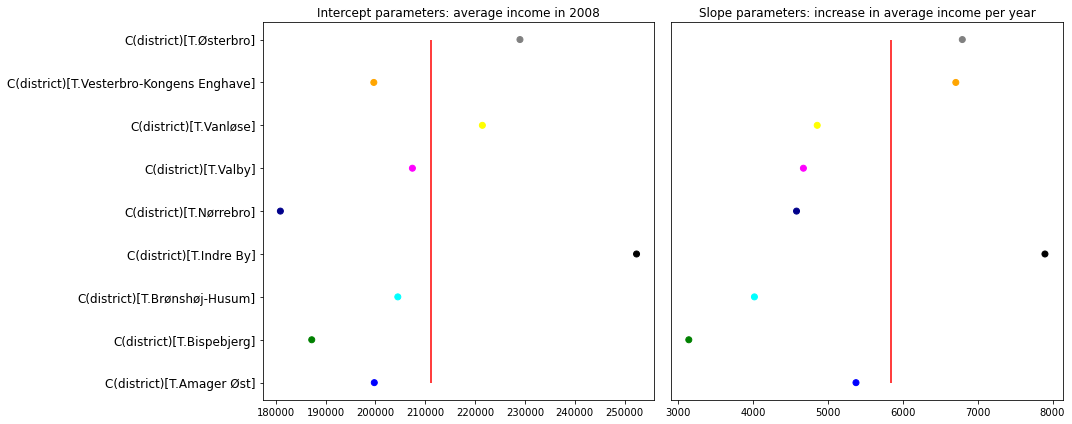

In [23]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
# plot intercept params 
axes[0].scatter(lm_fit.params[1:10].values+lm_fit.params[0],lm_fit.params[1:10].index, color=["blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"])
axes[0].vlines(lm_fit.params[0],0,8,colors='red')
axes[0].set_yticks(lm_fit.params[1:10].index)
axes[0].set_yticklabels(lm_fit.params[1:10].index, fontsize=12)
axes[0].set_title('Intercept parameters: average income in 2008',fontsize=12)

# Plot slope params
axes[1].scatter(lm_fit.params[11:].values+lm_fit.params[10],lm_fit.params[11:].index, color=["blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"])
axes[1].vlines(lm_fit.params[10],0,8,colors='red')
axes[1].set_yticks('')
axes[1].set_title('Slope parameters: increase in average income per year',fontsize=12)

plt.tight_layout()
plt.show()

In the model, Amager Vest is used as the reference district. Thus the parameters for this district is shown as red lines. The parameters of the other districts are then seen in respect to the parameters of Amager Vest. 

For the intercept parameters, it is seen that only the three districts Indre By, Østerbro and Vanløse are having higher average income than Amager Vest in 2008. While the average income of Valby in 2008 can be assumed the same as Amager Vest, the rest of the districts: Vesterbro, Nørrebro, Brønshøj-Husum, Bispebjerg and Amager Øst have a significant lower averagere income than Amager Vest in 2008. 

Looking at the slope parameters, we see that Indre By has the highest increase in average income per year followed by Østerbro and Vesterbro. While Bispebjerg has the lowest increase in average income per year compared to the other districts. 

Looking at Nørrebro, this district has the lowest average income in 2008, but a higher increase in average income per year than both Bispebjerg and Brønshøj. So something changed in Nørrebro in the period 2008-2020 making richer people move to this district. Could it be gentrification? 

Now that we are sure that the districts differ in average income, let's finally have a look at if and how this income difference has an impact on where the municipality of Copenhagen choose to plant trees! 

In [24]:
df_genial_corr = df_genial.sort_values(by='avg_income')
df_temp = df_genial_corr[['district','trees_km2','avg_income']]
#table_corr = pd.pivot_table(df_genial_corr, values='trees_km2', index=["avg_income"],columns=['district'])

reset_output() 
p1 = figure(plot_width = 900, plot_height = 500, title = "", 
            x_axis_label = "Average income", y_axis_label = "Number of trees per km2") 


colors = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
items1 = []

line ={}

# Insert fraction values in bars
for indx, i in enumerate(districts):
    x = df_temp[df_temp['district']==i]['avg_income']
    y = df_temp[df_temp['district']==i]['trees_km2']
    line[indx] = p1.line(x=x, y = y, width=1.5, color = colors[indx], muted =True)
    #Append items to create the legend
    items1.append((districts[indx], [line[indx]]))


#This is to manage the legend in plot
#add the legend outside the plot
legend = Legend(items=items1, location="top_left")
p1.add_layout(legend, 'left')

p1.legend.click_policy = "mute" #you can also try "hide"
p1.title.text_font_size = "20px"


output_notebook()
show(p1)

Loading BokehJS ...

At the above figure, the number of trees per km2 is plotted against the average income for each district. The curves are fluctuating much indicating no direct influence of average income on where trees are being planted. Besides the fluctuations, some of the districts seem to have no correlation between income and trees planted. For example try to click on Vesterbro and Vanløse. However, there might be a small positive correlation between incomst and trees planted for other districts. Try to click on Valby, Nørrebro or Østerbro. 

Now let's compute the correlation values. 

In [25]:
df_genial_corr = pd.DataFrame(index=districts, columns = ['correlation between average income and number of trees planted per km2'])
for dist in districts:
    temp = df_genial[df_genial['district']==dist]
    corr = temp[['avg_income','trees_km2']].corr()
    df_genial_corr.loc[dist,'correlation between average income and number of trees planted per km2'] = corr.iloc[0,1]

df_genial_corr.sort_values(by='correlation between average income and number of trees planted per km2', ascending=False, inplace=True)
df_genial_corr

,correlation between average income and number of trees planted per km2
Valby,0.578772
Nørrebro,0.481467
Østerbro,0.454545
Brønshøj-Husum,0.369778
Indre By,0.33235
Amager Vest,0.317334
Amager Øst,0.155212
Bispebjerg,0.125875
Vanløse,0.096192
Vesterbro-Kongens Enghave,0.048003


It is seen that the correlation between income and trees planted is varying a lot between the districrs in the range from 0.05 in Vesterbro to 0.58 in Valby. This indicates that the average income might not have an effect on the number of trees planted in general. 

Okay, now let's get to the point by fitting a linear model with the number of trees per km2 as response and year, district and average income as explanatory variables. What can we really say about richer districts and the number of trees planted?

Below is the anova tests outputs from the model fitting! Hang on to get the conclusions!

In [26]:
y_transform, lambda_fitted = stats.boxcox(df_genial['trees_km2']) # boxcox transformation to get response normal distributed
df_genial['trees_km2_transform'] = y_transform
df_model = df_genial.copy()
df_model['year'] = df_model['year']-2000
scaler = StandardScaler()
df_model['avg_income'] = scaler.fit_transform(df_genial['avg_income'].values.reshape(-1,1))

#Fit models 
print('First model fit: trees per km2 ~ district + year + avg_income + year:district + avg_income:district')
lm1 = smf.ols(formula='trees_km2_transform ~ C(district) + year + avg_income + year:C(district) + avg_income:C(district)', data = df_model)
lm_fit1 = lm1.fit()
lm_anova_fit1 = sm.stats.anova_lm(lm_fit1, typ=2) # Type 2 partitioning of variance
print(lm_anova_fit1) 
print('')

print('Second model fit: trees per km2 ~ district + year + avg_income + year:district')
lm2 = smf.ols(formula='trees_km2_transform ~ C(district) + year + avg_income + year:C(district)', data = df_model)
lm_fit2 = lm2.fit()
lm_anova_fit2 = sm.stats.anova_lm(lm_fit2, typ=2) # Type 2 partitioning of variance
print(lm_anova_fit2) 
print('')

print('Third model fit: trees per km2 ~ district + year + avg_income')
lm3 = smf.ols(formula='trees_km2_transform ~ C(district) + year + avg_income', data = df_model)
lm_fit3 = lm3.fit()
lm_anova_fit3 = sm.stats.anova_lm(lm_fit3, typ=2) # Type 2 partitioning of variance
print(lm_anova_fit3) 
print('')

print('Fourth model fit: trees per km2 ~ district + year')
lm4 = smf.ols(formula='trees_km2_transform ~ C(district) + year', data = df_model)
lm_fit4 = lm4.fit()
lm_anova_fit4 = sm.stats.anova_lm(lm_fit4, typ=2) # Type 2 partitioning of variance
print(lm_anova_fit4) 
print('HEY - all terms are now significant!')


First model fit: trees per km2 ~ district + year + avg_income + year:district + avg_income:district
                            sum_sq     df         F        PR(>F)
C(district)             163.058146    9.0  8.461190  1.768207e-10
year                      0.005906    1.0  0.002758  9.581753e-01
year:C(district)         21.537125    9.0  1.117575  3.525658e-01
avg_income                1.886162    1.0  0.880867  3.492432e-01
avg_income:C(district)   19.733745    9.0  1.023996  4.226329e-01
Residual                379.002265  177.0       NaN           NaN

Second model fit: trees per km2 ~ district + year + avg_income + year:district
                      sum_sq     df         F        PR(>F)
C(district)       163.058146    9.0  8.451377  1.490426e-10
year                1.930470    1.0  0.900514  3.438753e-01
year:C(district)   20.791671    9.0  1.077642  3.812040e-01
avg_income          1.886162    1.0  0.879846  3.494603e-01
Residual          398.736011  186.0       NaN           Na

Okay, again a bit advanced output from the model fitting. But hey, let's go through it together step by step. 

Let's look at the first model. This model uses the variables district, year, average income and the two interaction terms year:district and avg_income:district to describe the number of trees planted per km2. The output printed is an anova test showing if the variables are important to explain the number of trees planted per km2. In general if the p-value, shown in the last column PR(>F), is less than 0.05, the term is said to be important otherwise, the term can be excluded from the model. However, it is important only to remove one term at a time!

In the second model we have removed the most non important term from the first model fit - namely the interaction between district and average income. In the third model we have removed the interaction between year and district, since this is the most unsignificant term from the second model fit. In the fourth model we have removed average income since this was shown to be non significant in the third model fit. Finally, from the anova ouput from the fourth model, we see that both district and year are significant and thus important for describing the number of trees planted per km2. 

Puha, this was a lot of statistical methods! However, the model fitting procedure showed that the average income for the districts can not be used to describe the number of trees planted. 

If we try to fit a model only using district and average income as explanatory variables, we will see an effect of average income on the number of planted trees. Why is that?? This effect is caused by the fact that the average income is highly correlated with time (which we also saw earlier on one of the interactive plot of average income over time) - so the effect we see when fitting such a model is actually the effect of time on the number of planted trees!

Okay let's wrap up what we know for now. We have seen, that the amount of trees planted in Østerbro and Nørrebro is significanly higher than the other districts in the period 2008-2020. However, we were not able to explain the prioritisation of some districts over other by the average income of the districts. That is a good thing right? That the municipality of Copenhagen is not prioritasing richer districts when it comes to planting trees! 

So what now? Let's have a look on the best model from the above model fitting. What does this model tell us about the districts and number of planted trees? Recall that the best model fit only included the terms year and district. This means, that there is a significant difference in the number of trees planted per km2 between the districts in 2000, but the amount of trees planted unwards can be assumed to be the same for each district! This is very good news for the municipality of Copenhagen - the model does not say they are prioritising some districts over others when it comes to trees. But how does this relate to the previous findings about more trees being planted per km2 in Nørrebro and Østerbro from 2008-2020? Let's look at the model fit. 

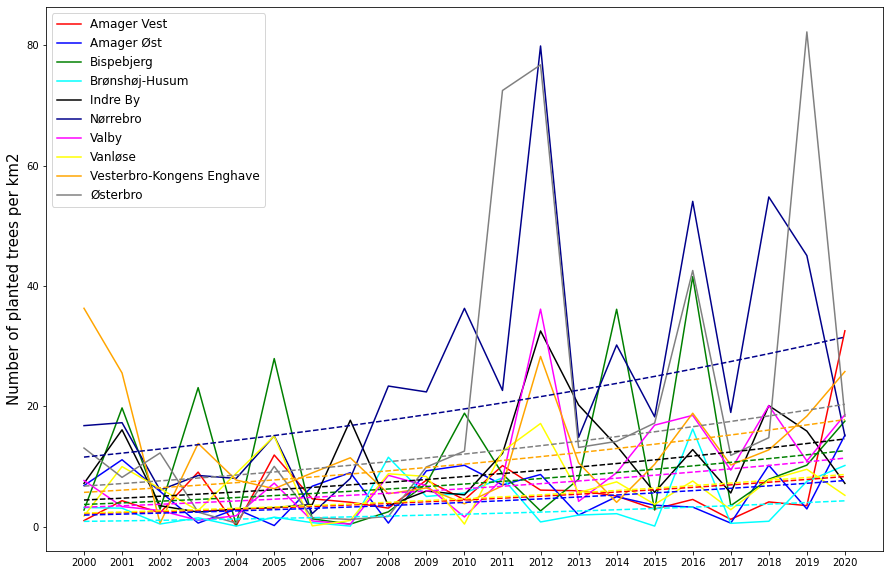

In [27]:
# Plot preditions in original domain
params = lm_fit4.params
cols = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
i = 0
plt.figure(figsize=(15,10))
for dist in districts:
    temp = df_model[df_model['district'] == dist] 
    plt.plot(temp['year'],temp['trees_km2'], color=cols[i]) # plot true values
    i = i+1

i = 0
for dist in districts:
    intercept_AV = params.Intercept
    if dist == 'Amager Vest':
        intercept = intercept_AV
    else:
        intercept = intercept_AV + (params[params.keys() == 'C(district)[T.'+str(dist)+']'].values[0])
    temp = df_model[df_model['district'] == dist] 
    preds = intercept + params.year*temp['year']
    preds_backtransform = np.power((preds*lambda_fitted + 1),(1/lambda_fitted))
    plt.plot(temp['year'].values,preds_backtransform.values, linestyle='dashed', color=cols[i]) # plot predictions
    i = i+1

plt.legend(districts, fontsize=12)
plt.xticks(ticks=temp['year'],labels=(temp['year']+2000))
plt.ylabel('Number of planted trees per km2', fontsize=15)
plt.show()

At the above figure, the true values (shown with solid lines) are plotted against the fitted values from the final model (shown with dashed lines). The smart reader will see, that the fitted lines from the model does not appear linear! But this is because the model is fitted in a transformed domain to optain better model fit and thus the fitted values will not appear linear in the original domain.  

Okay now back to the question of interest: why does the previous findings tell that the number of trees planted in Nørrebrø and Østerbro is signifantly larger than the other districts from 2008 and unwards when the best model have the same increase in planted trees per km2 per year for all districts? The thing is, that the model we have used is a linear model which is only able to capture trends and not able to capture large fluctuations. Thus the model is not capturing the high increase in number of trees being planted per km2 in Østerbro and Nørrebro in 2012, 2016 and 2018-2019. This is clearly seen at the above plot of the model fit, but let's also take a look at the model residuals (errors). 

In [28]:
# dataframe with residuals 
def backtransform(values,lambdaa):
    values_backtransform = np.power((values*lambdaa + 1),(1/lambdaa))
    return values_backtransform

temp = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[0]].values,lambda_fitted) )
temp1 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[1]].values,lambda_fitted) )
temp2 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[2]].values,lambda_fitted) )
temp3 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[3]].values,lambda_fitted) )
temp4 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[4]].values,lambda_fitted) )
temp5 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[5]].values,lambda_fitted) )
temp6 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[6]].values,lambda_fitted) )
temp7 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[7]].values,lambda_fitted) )
temp8 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[8]].values,lambda_fitted) )
temp9 = pd.DataFrame( backtransform(lm_fit4.resid[df_model['district']==districts[9]].values,lambda_fitted) )
df_res = pd.concat([temp,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9], ignore_index=True, axis=1)
df_res.columns = districts
df_res.index = (df_genial.year.unique()).astype(int)

reset_output() 
p1 = figure(plot_width = 900, plot_height = 500, title = "", 
            x_axis_label = "Year", y_axis_label = "Model error") 


colors = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
items1 = []

line ={}

# Insert fraction values in bars
for indx, i in enumerate(districts):
    line[indx] = p1.line(x=df_res.index, y = df_res[i], width=1.5, color = colors[indx], muted =True)
    #Append items to create the legend
    items1.append((districts[indx], [line[indx]]))


#This is to manage the legend in plot
#add the legend outside the plot
legend = Legend(items=items1, location="top_left")
p1.add_layout(legend, 'left')

p1.legend.click_policy = "mute" #you can also try "hide"
p1.title.text_font_size = "20px"


output_notebook()
show(p1)

Loading BokehJS ...

At the above figure, the residuals from the best model is plotted in the original domain. It is seen that the residuals are large every time there is a large fluctuation in the number of trees planted per km2. This shows that the model does not capture the large amount of trees planted in Østerbro and Nørrebro after 2008. 

Yay you made it through this section :D Let's go through the main findings together: 

1. The municipality of Copenhagen is fulfilling the principle of their tree policy regarding more trees over time. This was illustrated at the plot showing the trend of number of planted trees over time in Copenhagen and the plot showing the number of trees per km2 for each district. Also the linear model showed an increase in planted trees per km2 per year (how much? difficult to interpret because of the model being fitted in a transformed domain)
2. Both the model and the pairwise statistical test showed that there is a difference in the number of planted trees per km2 between the 10 districts of Copenhagen. The pairwise statistical test showed a difference from 2008 and forward where the number of trees planted per km2 were significantly larger in Østerbro and Nørrebro than the other districts. However, the model said that there was already a significant difference in the number of trees planted between the districts in 2000. However, the model was not able to capture the large amount of trees planted in Østerbro and Nørrebro in 2012, 2016 and 2018-2019.
3. A good finding was the one about average income. The difference in the number of trees planted between districts have nothing to do with the municipality prioritising districts where people are richer and have more resources to speak for themselves!
4. Finally, the large amount of trees planted in Nørrebro and Østerbro after 2008 seem to be mainly in the parks, in new communities such as Mimersparken and new city areas such as Nordhavn.

# Large variation in tree species? 

Okay, now let's take a look at the tree species being planted in the districts. 


In [30]:
# Function to create a bar chart of top 10 species for each district in tabs.
def stacked_bar_chart(dataframe, title, use_district):
    # Find the specific district and remove non registered
    temp = dataframe.loc[df['district'] == use_district]
    temp = temp[temp.species != "Ikke registreret"]
    # Find top 10 species for the specific district
    temp2 = temp.groupby(["district", 'species']).size().sort_values(ascending=False)[0:10].reset_index(name='counts')
    temp3 = temp2.pivot_table('counts',["species"], 'district')
    temp3.columns = [''.join(col) for col in temp3.columns]
    temp3.rename(columns={use_district: "count"}, inplace = True)
    # Make it ready for bokeh plot
    temp3 = temp3.reset_index()
    temp3 = temp3.sort_values(by='count', ascending=False)
    
    # Convert pandas df to ColumnDataSource
    src = ColumnDataSource(temp3)
    
    #Create empty figures
    p = figure(plot_width = 900, plot_height = 500, title = title,
            x_axis_label = "species", y_axis_label = "n_samples", x_range= temp3["species"]) 


    #Define the columns to use for each bar
    bar_cols = ["count"]
    colors = ["red"]
    #Create empty list for custom legend
    items = []

    #Add bars by using p.var
    bar ={}
    # Insert fraction values in bars
    for indx, i in enumerate(bar_cols):
        bar[i] = p.vbar(x="species", top = i, source= src, width=0.5, color=colors[indx], muted =True)
        #Append items to create the legend
        items.append((bar_cols[indx], [bar[i]]))
    

    #This is to manage the legend in plot
    #p.legend.visible = True
    #add the legend outside the plot
    legend = Legend(items=items, location="top_left")
    p.add_layout(legend, "left")
    p.legend.click_policy = "mute" #you can also try "hide"

    return p

In [32]:
# Visualize all 10 district and the count of their top 10 species
tab1 = Panel(child=stacked_bar_chart(df, 'Number of samples by species', 'Amager Vest'), title="Amager Vest")
tab2 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Amager Øst'), title="Amager Øst")
tab3 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Bispebjerg'), title="Bispebjerg")
tab4 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Brønshøj-Husum'), title="Brønshøj-Husum")
tab5 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Indre By'), title="Indre By")
tab6 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Nørrebro'), title="Nørrebro")
tab7 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Valby'), title="Valby")
tab8 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Vanløse'), title="Vanløse")
tab9 = Panel(child=stacked_bar_chart(df, 'Number of samples by species','Vesterbro-Kongens Enghave'), title="Vesterbro-Kongens Enghave")
tab10 =Panel(child=stacked_bar_chart(df, 'Number of samples by species','Østerbro'), title="Østerbro")
tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5, tab6, tab7, tab8, tab9, tab10])
show(tabs)

# Conclusion

Byfornyelse (Nordhavn), gentrificering (Nørrebro og Vesterbro) ... 

Mere fokus på udkast København: Amager, Brønshøj-Husum 